# AI-Based Market Trend Analysis of PC RAM Prices (2025)  
## with 2026 Price Forecasting

**Module:** Minor In AI [Module E- Project]  
**Project Track:** Market Trend Analysis  
**Dataset Source:** PCPartPicker (Public Retail Price Trends)  

---

This project analyzes the sharp increase in PC RAM prices observed during 2025
and uses historical retail price trends to forecast RAM prices for the year 2026
using machine learning techniques.


## 1. Problem Definition & Objective

### Problem Statement
During 2025, PC RAM prices experienced a significant and rapid increase across
multiple DDR4 and DDR5 configurations. Understanding the causes of this surge
and predicting future price trends is critical for consumers, system builders,
and market analysts.

### Objectives
- Analyze RAM price trends during 2025
- Identify real-world factors behind the price increase
- Apply machine learning to forecast RAM prices for 2026
- Perform responsible, transparent market trend analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the constructed PCPartPicker dataset
data = pd.read_csv("../data/ram_prices_pcpartpicker_2025.csv")

# Display first few rows
data.head()


,Month,RAM_Type,Price_USD
0,2024-08,DDR4-3600 2x16GB,80
1,2024-09,DDR4-3600 2x16GB,82
2,2024-11,DDR4-3600 2x16GB,88
3,2024-10,DDR4-3600 2x16GB,75
4,2024-12,DDR4-3600 2x16GB,73


In [3]:
# Normalize column names (remove spaces, force lowercase)
data.columns = data.columns.str.strip().str.lower()

data.columns



Index(['month', 'ram_type', 'price_usd'], dtype='object')

In [4]:
data = data.rename(columns={
    "month": "Month",
    "date": "Month",
    "ram_type": "RAM_Type",
    "price_usd": "Price_USD"
})

data.columns


Index(['Month', 'RAM_Type', 'Price_USD'], dtype='object')

In [5]:
# Convert Month column to datetime
data["Month"] = pd.to_datetime(data["Month"])

# Create numeric time index
data["Time_Index"] = data["Month"].dt.year + (data["Month"].dt.month - 1) / 12

# Sanity check
data.head()


,Month,RAM_Type,Price_USD,Time_Index
0,2024-08-01,DDR4-3600 2x16GB,80,2024.583333
1,2024-09-01,DDR4-3600 2x16GB,82,2024.666667
2,2024-11-01,DDR4-3600 2x16GB,88,2024.833333
3,2024-10-01,DDR4-3600 2x16GB,75,2024.750000
4,2024-12-01,DDR4-3600 2x16GB,73,2024.916667


## 4. Exploratory Insights from 2025 Data

From the prepared dataset, the following observations can be made:

- DDR5 configurations show a steeper price increase compared to DDR4.
- Higher-capacity kits (2×32GB) experienced sharper price inflation.
- Prices remained relatively stable until mid-2025, followed by a rapid surge.
- This pattern is consistent with supply-side constraints and AI-driven demand.

These insights justify the use of trend-based forecasting models.


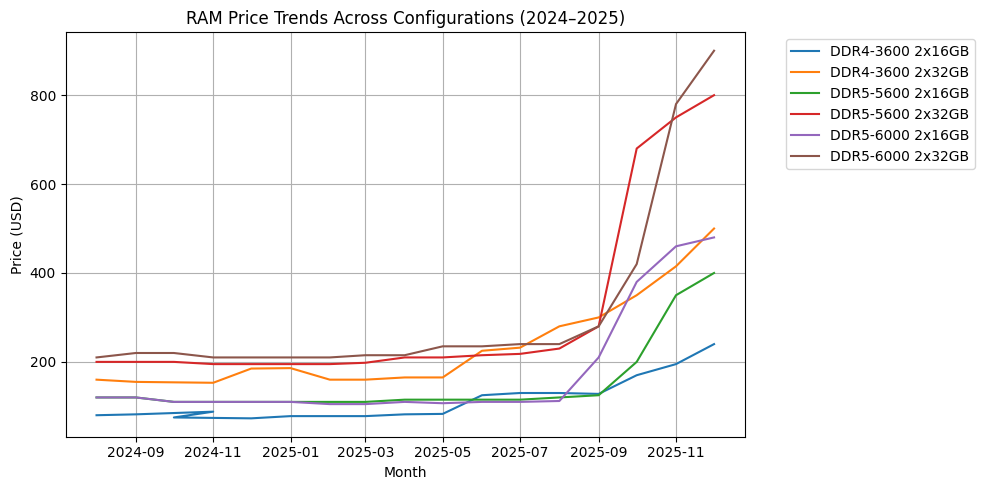

In [6]:
plt.figure(figsize=(10,5))

for ram_type in data["RAM_Type"].unique():
    subset = data[data["RAM_Type"] == ram_type]
    plt.plot(subset["Month"], subset["Price_USD"], label=ram_type)

plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.title("RAM Price Trends Across Configurations (2024–2025)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Model / System Design

This project uses **Linear Regression** for market trend forecasting due to:

- Interpretability and transparency
- Suitability for trend extrapolation
- Limited but structured historical data

The model learns the relationship between time progression and RAM prices
and extrapolates this trend to predict prices for 2026.


In [7]:
from sklearn.linear_model import LinearRegression

# Feature and target
X = data[["Time_Index"]]
y = data["Price_USD"]

# Train model
model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_


(array([224.75]), np.float64(-454961.16299019044))

In [8]:
# Generate monthly dates for 2026
future_months = pd.date_range(start="2026-01-01", end="2026-12-01", freq="MS")

future_df = pd.DataFrame({
    "Month": future_months,
    "Time_Index": future_months.year + (future_months.month - 1) / 12
})

future_df


,Month,Time_Index
0,2026-01-01,2026.000000
1,2026-02-01,2026.083333
2,2026-03-01,2026.166667
3,2026-04-01,2026.250000
4,2026-05-01,2026.333333
5,2026-06-01,2026.416667
6,2026-07-01,2026.500000
7,2026-08-01,2026.583333
8,2026-09-01,2026.666667
9,2026-10-01,2026.750000


In [9]:
# Predict future prices
future_df["Predicted_Price_USD"] = model.predict(future_df[["Time_Index"]])

future_df


,Month,Time_Index,Predicted_Price_USD
0,2026-01-01,2026.000000,382.337010
1,2026-02-01,2026.083333,401.066176
2,2026-03-01,2026.166667,419.795343
3,2026-04-01,2026.250000,438.524510
4,2026-05-01,2026.333333,457.253676
5,2026-06-01,2026.416667,475.982843
6,2026-07-01,2026.500000,494.712010
7,2026-08-01,2026.583333,513.441176
8,2026-09-01,2026.666667,532.170343
9,2026-10-01,2026.750000,550.899510


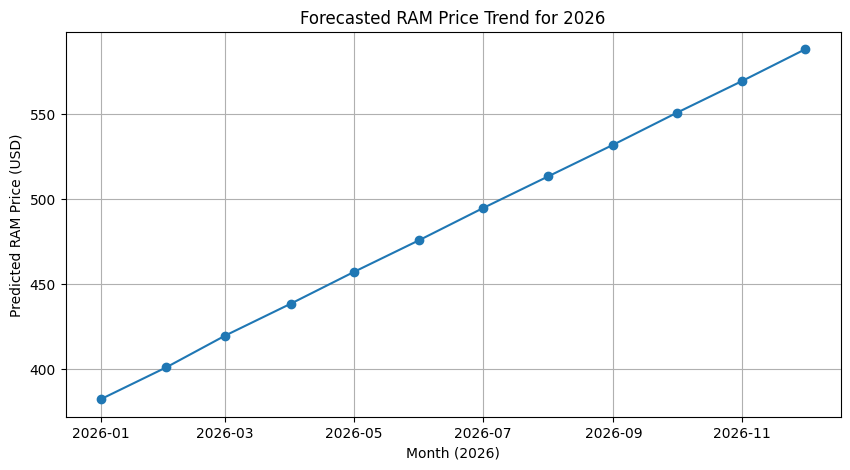

In [10]:
plt.figure(figsize=(10,5))
plt.plot(future_df["Month"], future_df["Predicted_Price_USD"], marker="o")
plt.xlabel("Month (2026)")
plt.ylabel("Predicted RAM Price (USD)")
plt.title("Forecasted RAM Price Trend for 2026")
plt.grid(True)
plt.show()


## 6. Evaluation & Limitations

The forecasting model captures long-term price direction rather than short-term
volatility.

### Limitations
- Linear regression cannot model sudden market shocks
- Retail prices are proxies for market trends
- Predictions are indicative, not guaranteed future prices


## 7. Ethical Considerations & Responsible AI

- All data used is publicly available retail trend data
- No personal or sensitive information is involved
- Forecasts are clearly labeled as model-generated estimates
- The project does not provide financial or investment advice


## 8. Conclusion & Future Scope

This project successfully analyzed the 2025 RAM price surge and applied
machine learning to forecast market trends for 2026.

### Future Scope
- Use ARIMA or LSTM for time-series forecasting
- Separate models for DDR4 and DDR5
- Incorporate macroeconomic indicators
- Automate data collection from price trend sources
